In [1]:
# lst转csv 并进行切割
import sys
import os
import pandas as pd
import librosa 
import numpy as np

wav_length = 16000*4
data_file = './csv/all_mic_wav.lst'
old_path = '/home/feipeng.pf/train_2020/'
file_path = '/mnt/users/fp111/work2020/'
save_path = '/mnt/users/daihuangyu/dataset/NKF_train/data/echo/'
df = pd.DataFrame(columns=['file_path'])
with open(data_file, 'r', encoding='UTF-8') as f:
    for line in f.readlines():
        true_path = line.replace(old_path , path)
        true_path = true_path.replace('\n','')
        dir_path, file_name = os.path.split(args.fea_train_csv)
        file_name, extension = os.path.splitext(file_name)
        wav = librosa.load(true_path, sr=16000)
        wav_len = np.size(wav)
        
        for i in range(int(wav_len/wav_length)):
            wav_cut = wav[i*wav_length:(i+1)*wav_length]
            wav_cut_path = dir_path + file_name + f'_{i}' + '.wav'
            print(wav_cut_path)
            df = df.append({'file_path':wav_cut_path}, ignore_index=True)
        
df.to_csv('./csv/echo_sig.csv',index=False,sep=',')

SyntaxError: invalid syntax (<ipython-input-1-0502e1ff3582>, line 23)

In [6]:
# 音频放大32768倍
import soundfile as sf
import librosa 


wav,_ = librosa.load("./2_story_50_60min.pcm_325.wav", sr=16000)
sf.write('wav1.wav', wav, 16000)

In [36]:
# csv文件保存出错
import pandas as pd
import os


path = '/mnt/users/daihuangyu/dataset/NKF_train/fea/train/'
train_csv = '/home/admin/AEC/NKF_train/csv/train/'
for i in range(8):
    df = pd.read_csv(train_csv + f'ref_sig_p{i+1}.csv')
    for j in range(len(df)):
        _, file_name = os.path.split(df.iloc[j]['file_path'])
        file_name, _ = os.path.splitext(file_name)
        file_path = path + file_name + '.npy'
        df.loc[j, ['file_path']] = file_path
    df.to_csv(train_csv + 'fea/' + f'ref_sig_p{i+1}.csv', index=False, sep=',')

complex64


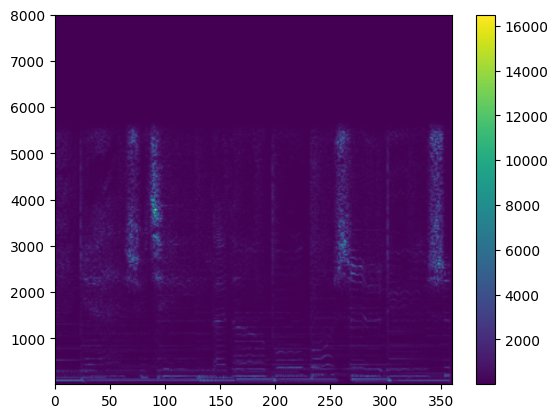

In [21]:
# 绘制STFT图，验证feature_extract 有效性

import matplotlib.pyplot as plt
import numpy as np
# /mnt/users/daihuangyu/dataset/NKF_train/fea/ref/1_music_100_30min.pcm_0.npy
#/mnt/users/daihuangyu/dataset/NKF_train/fea/ref/1_music_100_30min.pcm_0.npy
#/mnt/users/daihuangyu/dataset/NKF_train/fea/ref/1_music_100_30min.pcm_0.npy
#/mnt/users/daihuangyu/dataset/NKF_train/fea/ref/1_music_100_30min.pcm_0.npy
#/mnt/users/daihuangyu/dataset/NKF_train/fea/ref/1_music_100_30min.pcm_0.npy

stft = np.load('/mnt/users/daihuangyu/dataset/NKF_train/fea/ref/1_music_100_30min.pcm_0.npy')
print(stft.dtype)
extent = np.min(0), np.max(360), np.min(int(8000/1024)), np.max(8000)

plt.imshow(np.flipud(np.squeeze(np.abs(stft)*32768)),cmap=plt.cm.viridis, extent=extent,interpolation='bilinear',aspect='auto')
#plt.imshow(np.squeeze(SRP_PHAT[4, :, :]), interpolation='bilinear',extent=extent,aspect='auto')
plt.colorbar()
plt.show()

In [39]:
# 数据中存在nan， 进行排查删除
import pandas
import numpy as np

df=pd.read_csv('./csv/train/fea/speech.csv')
for i in range(len(df)):
    wav = np.load(df.iloc[i]['file_path'])
    if (np.isinf(np.sum(wav)) | np.isnan(np.sum(wav))):
        print(df.iloc[i]['file_path'])

In [43]:
# 数据检测
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_11.npy
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_12.npy
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_13.npy
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_14.npy
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_15.npy
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_16.npy
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_17.npy
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_18.npy
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_19.npy
# /mnt/users/daihuangyu/dataset/NKF_train/fea/train/1_music_100_30min.pcm_20.npy
# 10-20 loss异常 190-200 loss 变nan 
import matplotlib.pyplot as plt
import numpy as np

train_path = '/mnt/users/daihuangyu/dataset/NKF_train/fea/train/'
ref_path = '/mnt/users/daihuangyu/dataset/NKF_train/fea/ref/'
speech_path = '/mnt/users/daihuangyu/dataset/NKF_train/fea/speech/'
prefix = '1_music_100_30min.pcm_'
for i in range(0, 20):
    stft = np.load(train_path+prefix+str(i+1)+'.npy')

    plt.imshow(np.flipud(np.squeeze(np.abs(stft))),cmap=plt.cm.viridis, extent=extent,interpolation='bilinear',aspect='auto')
    plt.colorbar()
    plt.show()
    

SyntaxError: invalid syntax (<ipython-input-43-eb2e6f327962>, line 24)

In [4]:
# 数据中存在nan， 进行排查删除
import pandas
import numpy as np
import soundfile as sf
import torch

stft = lambda x: torch.stft(x, n_fft=512, hop_length=256, win_length=512,
                            window=torch.hann_window(512).to(device),
                            return_complex=True)
save_path = '/mnt/users/daihuangyu/AEC_Challenge/NKF_Data_From_AEC_Challenge/synthetic3/'
for i in range(0, 10000):
    wav, _ = sf.read(save_path + 'nearend_speech/' + f'nearend_speech_fileid_{i}.wav')
    if (np.isinf(np.sum(wav)) | np.isnan(np.sum(wav))):
        print(f'nearend_speech_fileid_{i}.wav')

In [20]:
import soundfile as sf
import numpy as np
save_path = '/mnt/users/daihuangyu/AEC_Challenge/NKF_Data_From_AEC_Challenge/synthetic_B12/'
for i in range(8356, 8360):
    wav, _ = sf.read(save_path + 'nearend_mic_signal/' + f'nearend_mic_fileid_{i}.wav')
    sf.write(f'{i}.wav',wav,16000)
    print(wav)
    print(np.max(np.abs(wav)))
    if (np.isinf(np.sum(wav)) | np.isnan(np.sum(wav))):
        print(f'nearend_speech_fileid_{i}.wav')


[ 5.49316406e-04 -2.13623047e-04  0.00000000e+00 ...  6.71691895e-02
  5.37963867e-01 -1.25061035e-01]
1.0
[0.00036621 0.00085449 0.00042725 ... 0.00411987 0.00082397 0.05041504]
1.0
[0.00912476 0.01794434 0.01254272 ... 0.05859375 0.09460449 0.12069702]
0.67413330078125
[0.00033569 0.00076294 0.0007019  ... 0.01583862 0.02026367 0.01867676]
0.53485107421875


In [ ]:
5212 5213 8515 8516